In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = {
    'ID': range(1, 21),
    'Nombre': [None, 'Maria', 'Pedro', 'Ana', 'Luis', 'Carlos', 'Maria', 'Pedro', 'Ana', 'Luis', 'Carlos', 'Maria', 'Pedro', 'Ana', 'Luis', 'Carlos', 'Maria', 'Pedro', 'Ana', 'Luis'],
    'Edad': [20, 21, 22, 23, None, 40, 26, 27, 28, 29, None, 31, 47, 33, 34, 48, 36, 37, 38, 39],
    'Salario': [50000, 1000, 500, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, None, 17000, 18000, 28000, 60000],
    'Ciudad': ['Madrid', 'Barcelona', None, 'Sevilla', 'Malaga', 'Cordoba', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Malaga', 'Cordoba', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Malaga', 'Cordoba', 'Madrid', 'Barcelona'],
    'Fecha_Ingreso': ['2020-01-01', None, '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', None, '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20']
}
df = pd.DataFrame(data)
display(df)


,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso
0,1,None,20.0,50000.0,Madrid,2020-01-01
1,2,Maria,21.0,1000.0,Barcelona,None
2,3,Pedro,22.0,500.0,None,2020-01-03
3,4,Ana,23.0,4000.0,Sevilla,2020-01-04
4,5,Luis,NaN,5000.0,Malaga,2020-01-05
5,6,Carlos,40.0,6000.0,Cordoba,2020-01-06
6,7,Maria,26.0,7000.0,Madrid,2020-01-07
7,8,Pedro,27.0,8000.0,Barcelona,2020-01-08
8,9,Ana,28.0,9000.0,Valencia,2020-01-09
9,10,Luis,29.0,10000.0,Sevilla,None


In [3]:
df.fillna({'Salario': df['Salario'].mean()}, inplace=True)

display(df)

,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso
0,1,None,20.0,50000.000000,Madrid,2020-01-01
1,2,Maria,21.0,1000.000000,Barcelona,None
2,3,Pedro,22.0,500.000000,None,2020-01-03
3,4,Ana,23.0,4000.000000,Sevilla,2020-01-04
4,5,Luis,NaN,5000.000000,Malaga,2020-01-05
5,6,Carlos,40.0,6000.000000,Cordoba,2020-01-06
6,7,Maria,26.0,7000.000000,Madrid,2020-01-07
7,8,Pedro,27.0,8000.000000,Barcelona,2020-01-08
8,9,Ana,28.0,9000.000000,Valencia,2020-01-09
9,10,Luis,29.0,10000.000000,Sevilla,None


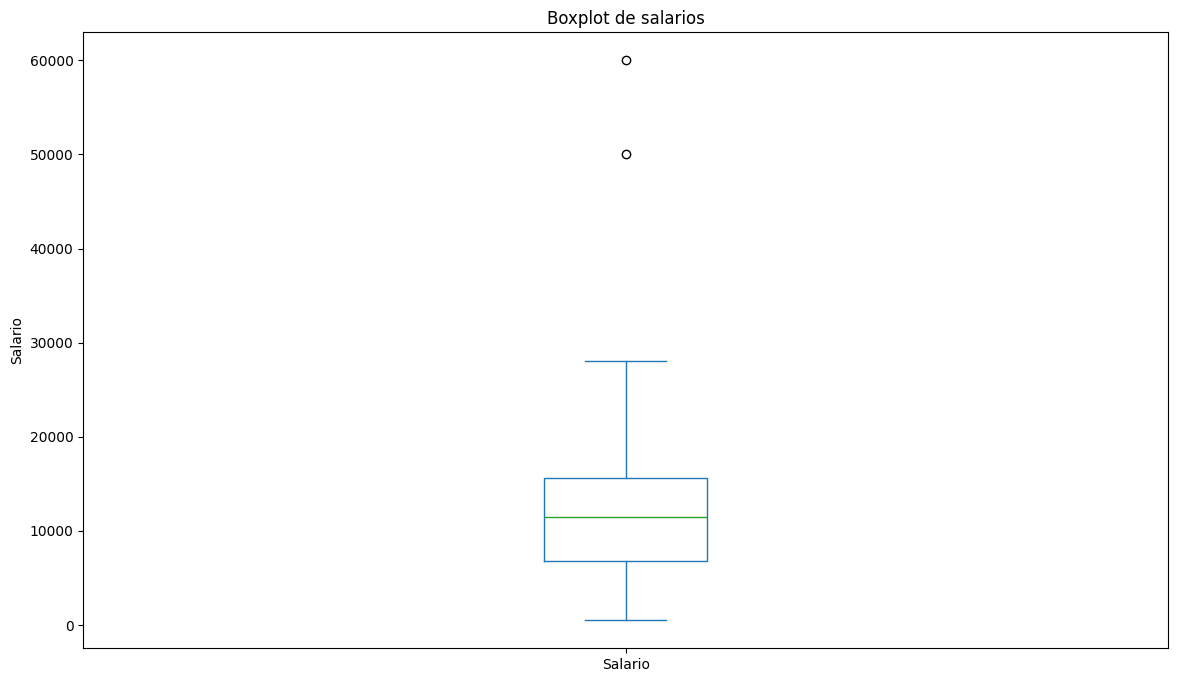

In [4]:
#Valores que no se encuentra dentro del rango de los datos
#Identificar si en el salario hay valores atipicos
#Primero vamos hacer un diagrama de cajas

plt.figure(figsize=(14,8))
df['Salario'].plot(kind='box')
plt.title('Boxplot de salarios')
plt.ylabel('Salario')
plt.show()


In [5]:
#Utilizando con los cuartiles IQR
Q1 = df['Salario'].quantile(0.25)
Q3= df['Salario'].quantile(0.75)
#Calculo el rango entrecuartilico
IQR = Q3 - Q1
#Ahora calcular los limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identificar lo outliers
outliers = df[(df['Salario'] < lower_bound) | (df['Salario'] > upper_bound)]
display(outliers)



,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso
0,1,None,20.0,50000.0,Madrid,2020-01-01
19,20,Luis,39.0,60000.0,Barcelona,2020-01-20


In [6]:
#Sect Scorll para mirar los valores atipicos con la desviacion standar
df['Z_Score'] = stats.zscore(df['Salario'])
display(df)

,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso,Z_Score
0,1,None,20.0,50000.000000,Madrid,2020-01-01,2.362469
1,2,Maria,21.0,1000.000000,Barcelona,None,-0.962487
2,3,Pedro,22.0,500.000000,None,2020-01-03,-0.996415
3,4,Ana,23.0,4000.000000,Sevilla,2020-01-04,-0.758919
4,5,Luis,NaN,5000.000000,Malaga,2020-01-05,-0.691062
5,6,Carlos,40.0,6000.000000,Cordoba,2020-01-06,-0.623206
6,7,Maria,26.0,7000.000000,Madrid,2020-01-07,-0.555350
7,8,Pedro,27.0,8000.000000,Barcelona,2020-01-08,-0.487494
8,9,Ana,28.0,9000.000000,Valencia,2020-01-09,-0.419637
9,10,Luis,29.0,10000.000000,Sevilla,None,-0.351781


In [7]:
#Ahora identificar los outliers con los zscore
outliers_zscore = df[df['Z_Score'].abs()>1]
display(outliers_zscore)

,ID,Nombre,Edad,Salario,Ciudad,Fecha_Ingreso,Z_Score
0,1,None,20.0,50000.0,Madrid,2020-01-01,2.362469
19,20,Luis,39.0,60000.0,Barcelona,2020-01-20,3.041031
